<a href="https://colab.research.google.com/github/bstrain71/422_MNIST/blob/master/Strain_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [0]:
import pandas as pd
import math
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
test_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/MNIST/test.csv')
train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/MNIST/train.csv')

In [6]:
print(train_df.shape) # 42000x785? OK
print(test_df.shape) # 28000x784? OK

(42000, 785)
(28000, 784)


## (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.


In [0]:
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

(1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

In [8]:
# calculate recommended max depth and max features
math.log2(784) # max features is the square root of number of predictors


9.614709844115207

In [9]:
from sklearn.ensemble import RandomForestClassifier

start=datetime.now()
rforest = RandomForestClassifier(n_estimators = 100,
                                 max_features = 10).fit(X_train, y_train)
end=datetime.now()
print(end-start)

0:00:13.111006


In [0]:
rforest_predictions = pd.DataFrame(rforest.predict(test_df))
rforest_predictions['ImageId'] = test_df.index + 1
rforest_predictions = rforest_predictions.rename(columns={0:"Label"})
rforest_predictions = rforest_predictions.reindex(columns=['ImageId','Label'])



In [11]:
print(rforest_predictions.columns)

Index(['ImageId', 'Label'], dtype='object')


In [12]:
rforest_predictions.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [0]:
export_csv = rforest_predictions.to_csv (r'/content/randomforest_results.csv',
                        index = None,
                        header=True)

Kaggle.com Info

Score: 0.96271

Username: brandonian (https://www.kaggle.com/brandonian)

Model train time: 0:00:13.374553

## (2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

In [14]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Combine test and training sets ** this is wrong **
combined_df = train_df.append(test_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [16]:
combined_df.shape

(70000, 785)

In [18]:
combined_df.head()

,label,pixel0,pixel1,pixel10,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel11,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel12,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel13,pixel130,pixel131,pixel132,...,pixel769,pixel77,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel78,pixel780,pixel781,pixel782,pixel783,pixel79,pixel8,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel9,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,30,137,137,192,86,72,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,141,139,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,130,155,254,254,254,157,30,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# split the combined dataframe into predictor variables (cX) and dependent (cY)
cX = combined_df.drop(columns=['label'])
cY = combined_df['label']

print(cX.shape) # verify shapes
print(cY.shape)


(70000, 784)
(70000,)


In [54]:
from sklearn.decomposition import PCA
pca = PCA(2)
projected = pca.fit_transform(cX)
print(cX.shape)
print(projected.shape)

(70000, 784)
(70000, 2)


In [63]:
pca = PCA(2).fit(cX)
print(pca.explained_variance_ratio_)

[0.09746116 0.07155445]


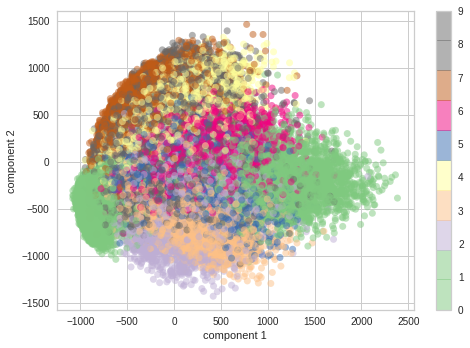

In [36]:
# plot the two principal components and color them according to their label
plt.scatter(projected[:, 0], projected[:, 1],
            c=cY, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [60]:
pca = PCA(200).fit(cX)
print(pca.explained_variance_ratio_)

[0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937 0.0106604  0.01009794 0.00959151 0.00909635
 0.00883287 0.00838818 0.00809832 0.00785718 0.00740262 0.00690014
 0.00656144 0.0064547  0.00600819 0.00585612 0.00566754 0.00543471
 0.00504717 0.00487079 0.00478955 0.00467594 0.00454369 0.00444918
 0.00418217 0.00396164 0.00383708 0.00375785 0.00361426 0.00349025
 0.00338732 0.00319696 0.00316854 0.00310145 0.0029648  0.00287101
 0.00282514 0.00269423 0.00268392 0.00256509 0.00253168 0.00244648
 0.00239702 0.00238581 0.00229234 0.00220949 0.0021306  0.00206317
 0.00202781 0.00195035 0.00191471 0.0018855  0.00186976 0.00180104
 0.00176787 0.00173359 0.00164849 0.00163237 0.00161408 0.00154304
 0.0014702  0.00142199 0.00141016 0.00140146 0.00139605 0.00135024
 0.00132371 0.00131893 0.00129197 0.00125172 0.00122529 0.0012

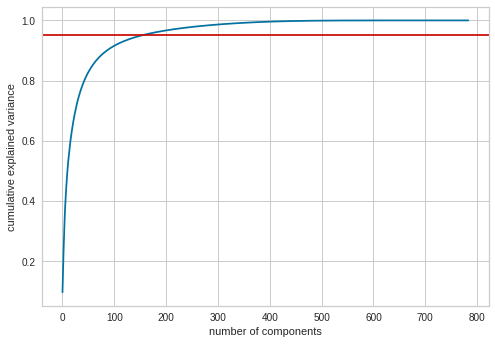

In [41]:
# find ideal number of components
pca = PCA().fit(cX)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color = 'r');

In [43]:
# do it again with 200 principal components instead of 2
pca = PCA(200)
projected = pca.fit_transform(cX)
print(cX.shape)
print(projected.shape)

(70000, 784)
(70000, 200)
